<a href="https://www.kaggle.com/code/remakia/introduction-to-ner-part-i-rule-based?scriptVersionId=222547384" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
!pip install jupyter_black
!pip install "packaging==21.3"
!pip install "black==22.1.0"
!pip install "edsnlp[ml]==0.15.0"
%reload_ext jupyter_black

# Introduction to Named Entity Reocgnition (NER) and its clinical applications

This notebook will explore the world of NER, examining the underlying concepts and techniques that make it possible and showcasing real-world applications of NER in the medical domain.

# What Is Named Entity Recognition ?

At its core, Named Entity Recognition, or NER for short, is a subtask of NLP that focuses on identifying and classifying entities within textual data. These entities encompass a diverse range of information, including names of individuals, organizations, locations, dates, numerical values, and more. NER equips machines with the ability to extract these entities, making it a fundamental tool for diverse applications across various industries.

![NER_health.png](https://www.johnsnowlabs.com/wp-content/uploads/2023/04/1_0T2vy3DbBnLzI01KfGFUng.webp)

From the above image, you might have gotten some ideas about what an NER model does. The model can find different entities that are present in the text, such as persons, dates, organizations, and locations. Thus NER helps in adding more meaning to the text document. In simple words, you can say that it is doing information extraction.

# Task: Detecting drug treatment in a medical document

The objective of this class is to extract automatically with a NER method the chemical and drug names (CHEM) from medical documents.

# I. Rule-Based Approaches
Rule-based approaches are one of the earliest and simplest techniques used for named entity recognition (NER). In rule-based approaches, a set of handcrafted rules and patterns are defined to identify entities in text data.

# i. NER on one text with manual patterns


## Introduction to Spacy

spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python. For more information check out the [documentation](https://spacy.io/usage/spacy-101).


## Architecture

The central data structures in spaCy are the [Language](https://spacy.io/api/language) class, the [Vocab](https://spacy.io/api/vocab) and the [Doc](https://spacy.io/api/doc) object. The `Language` class is used to process a text and turn it into a `Doc` object. It’s typically stored as a variable called `nlp`. The `Doc` object owns the **sequence of tokens** and all their annotations. The `Doc` object is constructed by the [Tokenizer](https://spacy.io/api/tokenizer), and then modified in place by the components of the pipeline.

![image.png](https://spacy.io/images/architecture.svg)




### First example

Let's try with a simple example: Extract Disorder (DISO) and the Drug name (DRUG) from the text below:

`"Le patient atteint de Covid 19 ne tolère pas le paracétamol"`


In [ ]:
import spacy

print(spacy.__version__)

In [ ]:
text = "Le patient atteint de Covid 19 ne tolère pas le paracétamol"
print(text)

## Tokenization

During processing, spaCy first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language. For example, punctuation at the end of a sentence should be split off – whereas “U.K.” should remain one token. Each Doc consists of individual tokens, and we can iterate over them:

While punctuation rules are usually pretty general, tokenizer exceptions strongly depend on the specifics of the individual language. This is why each available language has its own subclass, like English or French, that loads in lists of hard-coded data and exception rules in the [spacy.blank](https://spacy.io/usage/spacy-101#annotations) method 

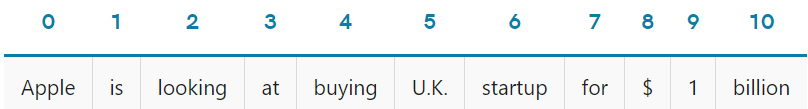

In [ ]:
# Import the NLP framework spaCy
import spacy

# Load the French language model
nlp = spacy.blank("fr")

# Apply the pipeline and get a spaCy Doc object.
doc = nlp(text)

# If you do not want to run the pipeline but only tokenize the text
doc = nlp.make_doc(text)

# Text processing in spaCy is non-destructive
doc.text == text

# You can access a specific token
token = doc[2]  # The third token

# And create a Span using slices
span = doc[:3]  # The first three tokens

print(f"The tokens: {list(doc)}\nA Span: {doc[:3]}")

## Using the entity ruler

The [EntityRuler](https://spacy.io/api/entityruler) is a pipeline component that’s typically added via [nlp.add_pipe](https://spacy.io/api/language#add_pipe). When the nlp object is called on a text, it will find matches in the doc and add them as entities to the `doc.ents`, using the specified pattern label as the entity label. If any matches were to overlap, the pattern matching most tokens takes priority. If they also happen to be equally long, then the match occurring first in the Doc is chosen.

In [ ]:
# Create a new pipeline component for entity recognition
ruler = nlp.add_pipe("entity_ruler")

## Define [Entity patterns](https://spacy.io/usage/rule-based-matching#entityruler-patterns)

Entity patterns are dictionaries with two keys: "label", specifying the label to assign to the entity if the pattern is matched, and "pattern", the match pattern. The entity ruler accepts two types of patterns:

1. Phrase patterns for exact string matches (string).

```python
{"label": "ORG", "pattern": "Apple"}
```

2. Token patterns with one dictionary describing one token (list).

```python
{"label": "GPE", "pattern": [{"LOWER": "san"}, {"LOWER": "francisco"}]}
```


In [ ]:
# Define some patterns to match entities
patterns = [
    {
        "label": "DRUG",
        "pattern": "paracétamol",
    },  # match "PARACETAMOL" as a "Drug name"
    {
        "label": "DISO",
        "pattern": [{"LOWER": "covid"}, {"LOWER": "19"}],
    },  # match "Covid 19" as a "Disroder"
    # LOWER attribute makes it case insensitive: it matchs also "CoVId 19"
]

# Add the patterns to the entity ruler
ruler.add_patterns(patterns)


# Process some text with the pipeline
doc = nlp(text)


# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

## Visualizing the entity recognizer

The entity visualizer, `ent`, highlights named entities and their labels in a text.

In [ ]:
import spacy
from spacy import displacy

displacy.render(doc, style="ent")

**YOUR TURN !**
## Sub-task 1

Extract with the Spacy [entity_ruler](https://spacy.io/api/entityruler) pipeline the "Chemicals and Drugs" (`CHEM` label) from the text below: `Carbonate de lithium`, `antihistaminique` and `Cétirizine`.

```
"Perfusion d'une ampoule de Carbonate de lithium et introduction d'un antihistaminique par Cétirizine 10 mg x 2 par jour, avec diminution puis disparition de l'oedème."
```

In [ ]:
text = "Perfusion d'une ampoule de Carbonate de lithium et introduction d'un antihistaminique par Cétirizine 10 mg x 2 par jour, avec diminution puis disparition de l'oedème."
print(text)

In [ ]:
# Load the French language model
nlp = spacy.blank("fr")

# Create a new pipeline component for entity recognition
ruler = nlp.add_pipe("entity_ruler")

# Define some patterns to match entities

## YOUR CODE HERE
# Find the 3 patterns matching Carbonate de lithium, antihistaminique and Cétirizine
patterns = 

## END YOUR CODE

# Add the patterns to the entity ruler
ruler.add_patterns(patterns)

# Process some text with the pipeline
doc = nlp(text)

# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

# Visualize the result
displacy.render(doc, style="ent")

### **Issue**: The pipeline does not apply to all drugs 

In [ ]:
text = "Le patient a avalé un comprimé de FLUOCARIL BI-FLUORE le matin, un doliprane le midi et deux Paracetamol le soir"

# Process some text with the pipeline
doc = nlp(text)

# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

displacy.render(doc, style="ent")

### **Solution**: Adding all known french drug names in the pipeline's patterns

# ii. NER on one text with a knowledge dictionary

## Introducing ROMEDI database

We are using the "Référentiel Ouvert du Médicament" (ROMEDI). [ROMEDI](https://bioportal.lirmm.fr/ontologies/ROMEDI?p=summary) is a database derived from the public drug database: http://base-donnees-publique.medicaments.gouv.fr/ It was created and is maintained by the Equipe de Recherche en Informatique Appliquée à la Santé (ERIAS), Université de Bordeaux, Inserm [Cossin et al., 2019](https://ebooks.iospress.nl/publication/51952).

It contains **5789 drug names**.

## Load the drugs dictionary

In [ ]:
import json

# Path of the knowledge dictionary
drugs_dict_path = "/kaggle/input/drugs-dictionary/drugs.json"

# Opening JSON file
with open(drugs_dict_path) as json_file:
    drugs_dict = json.load(json_file)

print(drugs_dict)

## Using the entity ruler with large amount of patterns

## Sub-task 2

Add all drug names from the [ROMEDI](https://bioportal.lirmm.fr/ontologies/ROMEDI?p=summary) database to the Spacy [entity_ruler](https://spacy.io/api/entityruler) pipeline's patterns. In order to extract the "Chemicals and Drugs" (`CHEM` label) from the text below:

```
""Le patient a avalé un comprimé de FLUOCARIL BI-FLUORE le matin, un doliprane le midi et deux Paracetamol le soir"
```

*Tips*:
- Make sure it is case insensitive (Use **LOWER** atribute for token patterns).
- Make sure it matchs drugs with multiple tokens such as "FLUOCARIL BI-FLUORE".

In [ ]:
text = "Le patient a avalé un comprimé de FLUOCARIL BI-FLUORE le matin, un doliprane le midi et deux Paracetamol le soir"
print(text)

In [ ]:
# Load the French language model
nlp = spacy.blank("fr")

# Create a new pipeline component for entity recognition
ruler = nlp.add_pipe("entity_ruler")

# Define some patterns to match entities
## YOUR CODE HERE
# Find the patterns matching all drug names from ROMEDI database
# Be careful with the drugs containint multiple tokens


patterns = 


## END YOUR CODE

ruler.add_patterns(patterns)

# Process some text with the pipeline
doc = nlp(text)

# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

# Visualize the result
displacy.render(doc, style="ent")

### **Issue**: the pipeline does not detect drugs with **accents**

Now we have a rule-based pipeline able to detect any drugs from the ROMEDI database. **However, It does not detect drugs with accents.**

In [ ]:
text = "Le patient a avalé un comprimé de FLUOCARIL BI-FLUORE le matin, un doliprane le midi et deux Paracétamol le soir"

# Process some text with the pipeline
doc = nlp(text)

# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

displacy.render(doc, style="ent")

### **Solution**: Normalizing the text before the NER process

## Normalization

The normalisation scheme adheres to the non-destructive doctrine. In other words,`nlp(text).text == text` is always true. To achieve this, the input text is never modified.Instead, the `norm_` attribute of each token is modified.

## Sub-task 3

Remove accents from the `norm_` attribute of each token by using the `unidecode()` function.

In [ ]:
from unidecode import unidecode


@spacy.Language.component("normalize")
def normalize(doc):
    for token in doc:
        ## YOUR CODE HERE (1 line)
        ## Remove accent from `.norm_` accent
        
        ## END YOUR CODE
    return doc

In [ ]:
# Load the French language model
nlp = spacy.blank("fr")

# Create a new pipeline component for entity recognition
nlp.add_pipe("normalize")

# Create a new pipeline component for entity recognition
ruler = nlp.add_pipe("entity_ruler")

# Define some patterns to match entities
## YOUR CODE HERE
# Use the NORM attribute instead of LOWER attribute


patterns = 


## END YOUR CODE

ruler.add_patterns(patterns)

# Process some text with the pipeline
doc = nlp(text)

# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

# Visualize the result
displacy.render(doc, style="ent")

### Congrats

Now we have a rule-based pipeline, normalizing text and detecting any drugs from the ROMEDI database. Let's try it on a real Corpus.

In [ ]:
nlp.to_disk("model_rule_based")

# iii. NER on real wolrd data with multiple texts

## Introducing QUAERO 2016

The [**QUAERO French Medical Corpus**](https://quaerofrenchmed.limsi.fr/) has been initially developed as a resource for named entity recognition and normalization. It was then improved with the purpose of creating a gold standard set of normalized entities for French biomedical text, that was used in the CLEF eHealth evaluation lab.

The QUAERO dataset is divided into 2 datasets:
- MEDLINE: A selection of 2497 annotated MEDLINE titles.
- EMEA: A selection of 9 annotated EMEA documents (drug evaluation documents made by the European Medicines Agency) divided into 35 files.

### Annotation

The annotation process was guided by concepts in the [Unified Medical Language System (UMLS)](https://www.nlm.nih.gov/research/umls/index.html): Ten types of clinical entities, as defined by the following [UMLS Semantic Groups](https://lhncbc.nlm.nih.gov/semanticnetwork/download/SemGroups.txt) (Bodenreider and McCray 2003) were annotated:
- Anatomy (ANAT)
- Chemical and Drugs (CHEM)
- Devices (DEVI)
- Disorders (DISO)
- Geographic Areas (GEOG)
- Living Beings (LIVB)
- Objects (OBJC)
- Phenomena (PHEN)
- Physiology (PHYS)
- Procedures (PROC)


Annotations are available in the BRAT Rapid Annotation Tool (BRAT) standoff format, described here: http://brat.nlplab.org/standoff.html, which can be loaded into BRAT for vizualization.
![image.png](https://quaerofrenchmed.limsi.fr/images/quaeroFRmed_MEDLINE.jpg)
![image.png](https://quaerofrenchmed.limsi.fr/images/quaeroFRmed_EMEA.jpg)

### BRAT standoff format
The annotations are stored separately from the annotated document text, which is never modified by the tool.

For each text document in the system, there is a corresponding annotation file. The two are associatied by the file naming convention that their base name (file name without suffix) is the same: for example, the file `10028548.ann` contains annotations for the file `10028548.txt`.

### Text files (.txt)
Text files are expected to have the suffix `.txt` and contain the text of the original documents input into the system.

```
Analyse minéralogique et exploration des pathologies asbestosiques.
```

The document texts are stored in plain text files encoded using UTF-8 (an extension of ASCII — plain ASCII texts work also).

### Annotation files (.ann)
Annotations are stored in files with the `.ann` suffix:
```
T1	PROC 0 7	Analyse
#1	AnnotatorNotes T1	C0936012
T2	DISO 41 66	pathologies asbestosiques
#2	AnnotatorNotes T2	C0003949
```

### Have a look !

Please, go to the `quaero` data folder and have look on the different data files.

## Converting BRAT data into a list of Spacy Doc

In order to use our spacy pipeline, we need to convert the Brat data into a list of Spacy [Doc]. Thanks to the python library [EDS-NLP](https://aphp.github.io/edsnlp/v0.10.5/), you can easily integrate BRAT into your spacy project.

The [BratReader](https://aphp.github.io/edsnlp/v0.10.5/data/) (or edsnlp.data.read_standoff) reads a directory of BRAT files and yields Spacy [Doc](https://aphp.github.io/edsnlp/latest/tutorials/spacy101/) objects.

## Sub-task 4:

- Convert the BRAT dev data folder from MEDLINE dataset to a list of Spacy doc, with the [edsnlp.data.read_standoff()](https://aphp.github.io/edsnlp/latest/data/standoff/#edsnlp.data.standoff.read_standoff) function. 
- Use  the [span_setter](https://aphp.github.io/edsnlp/latest/reference/edsnlp/utils/span_getters/#edsnlp.utils.span_getters.SpanSetterArg) argument in order to keep only the `CHEM` labelled entities.

In [ ]:
import edsnlp

# Path of the dev MEDLINE dataset
dev_dataset = "/kaggle/input/quaero/QUAERO_FrenchMed/corpus/dev/MEDLINE"

# Data Connector
## YOUR CODE HERE (1 line)
# use edsnlp.data.read_standoff() function
# complete the span_setter argument


## END YOUR CODE

`edsnlp.data.read_standoff()` returns a [LazyCollection](https://aphp.github.io/edsnlp/latest/concepts/inference/#edsnlp.core.lazy_collection.LazyCollection):
To iterate over the documents multiple times efficiently or to access them by
index, you must convert it to a list :

In [ ]:
true_docs = list(doc_iterator)

## Visualizing annotations

The entity visualizer, `ent`, highlights named entities and their labels in a text.

In [ ]:
from spacy import displacy

displacy.render(true_docs[3], style="ent")

## Processing multiple texts

We've seen how to apply a spaCy NLP pipeline to a single text. Let's deploy it on a large number of documents.

## Sub-task 5
Implement a function that processes a list of Spacy Doc (`test_docs` object) with a spaCy NLP pipeline (`nlp` object) document by document using a for loop.

*Tips*: The output Doc must not contain the annotation ! To do that, make sure to process only the text (`doc.text`) of the sapcy Doc.

In [ ]:
from typing import List
from spacy.tokens import Doc
from spacy import Language


def process_docs(nlp: Language, docs: List[Doc]) -> List[Doc]:
    """Process document by document in a for loop an returns the list of predicted documents"""
    ## YOUR CODE HERE

    
    ## END YOUR CODE
    return pred_docs

In [ ]:
pred_docs = process_docs(nlp=nlp, docs=true_docs)
displacy.render(pred_docs[3], style="ent")

## NER Evaluation

In pattern recognition, information retrieval, object detection and classification (machine learning), precision and recall are performance metrics that apply to data retrieved from a collection, corpus or sample space. These metrics are based on the numbers of True positives (TP), False positives (FP) and False negatives (FN):
- True Positive (TP): entity that is returned by a NER system and also appears in the ground truth.
- False Positive (FP): entity that is returned by a NER system but does not appear in the ground truth.
- False Negative (FN): entity that is not returned by a NER system but appears in the ground truth.


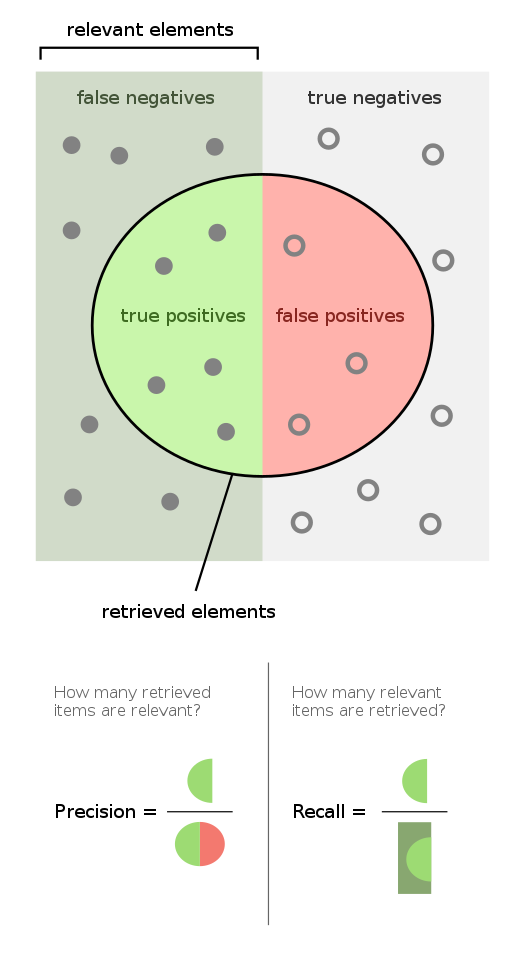

### Matching mode

A True Positive (TP) result is obtained when the predicted entity matches the ground truth entity. There are two types of "match":
- **Exact** boundary matching：predicted entity boundaries is exaclty the same as the true entity boudaries.
- **Partial** boundary matching：predicted entity boundaries overlap the true entity boudaries.

## Sub-task 6
Implement a function that returns `True` when two entities are matching and `False` otherwise. Taking into account the matching mode (`exact` or `partial`)


In [ ]:
from typing import List
from spacy.tokens import Doc, Span
from spacy import Language


def is_match(true_ent: Span, pred_ent: Span, matching_mode: str = "exact") -> bool:
    """Returns True if the predicted entity matches the ground truth entity.
    If matching_mode = "exact": The function returns True when the entity boundaries are exactly the same.
    If matching_mode = "partial" The function returns True when the entity boundaries are overlaping.
    """
    start_char_true, end_char_true = (true_ent.start_char, true_ent.end_char)
    start_char_pred, end_char_pred = (pred_ent.start_char, pred_ent.end_char)
    if matching_mode == "exact":
        ## YOUR CODE HERE

        
        ## END YOUR CODE
    elif matching_mode == "partial":
        ## YOUR CODE HERE

        
        
        ## END YOUR CODE

    else:
        raise ValueError(
            f"Expecting matching_mode to be 'exact' or 'partial' and not {matching_mode}"
        )

### Metrics

### 1. Precision:
Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances. Written as a formula:

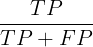

### 2. Recall:
Recall, or sensitivity, gauges the model’s ability to identify all relevant positive entities. It is the fraction of relevant instances that were retrieved. Written as a formula:

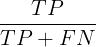

### 3. F1 Score:
The F1 score is the harmonic mean of precision and recall:

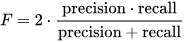

## Sub-task 7
Implement a function that compare documents by documents two list of Spacy Doc and returns a dictionary with:
   - The number of True Positive (TP): predicted entities matching true entities.
   - The number of False Positive (FP): predicted entities not matching any true entities.
   - The number of False Negative (FN): true entities not matching any predicted entities.
   - The Precision (precision): the fraction of relevant instances among the retrieved instances.
   - The Recall (recall): the fraction of relevant instances that were retrieved.
   - The F1-score (f1): the harmonic mean of precision and recall.

In [ ]:
from typing import List, Dict
from spacy.tokens import Doc


def evaluate(
    true_docs: List[Doc], pred_docs: List[Doc], matching_mode: str = "exact"
) -> Dict:
    """Compare documents by documents two list of Spacy Doc and returns a dictionary with:
    - The number of True Positive (TP): predicted entities matching true entities.
    - The number of False Positive (FP): predicted entities not matching any true entities.
    - The number of False Negative (FN): true entities not matching any predicted entities.
    - The Precision (precision): the fraction of relevant instances among the retrieved instances.
    - The Recall (recall): the fraction of relevant instances that were retrieved.
    - The F1-score (f1): the harmonic mean of precision and recall.
    """
    scores = {"TP": 0, "FP": 0, "FN": 0}
    for true_doc, pred_doc in zip(true_docs, pred_docs):
        ## YOUR CODE HERE (~15 lines)

        
        
        ## END YOUR CODE
            
    ## YOUR CODE HERE
    # Compute Precision, Recall, F1
    # Precision

    # Recall


    # F1

    
    ## END YOUR CODE
    return scores

### Sanity check

The `evaluate(test_docs, test_docs)` function should retrun `{'TP': 765, 'FP': 0, 'FN': 0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}`

In [ ]:
evaluate(true_docs=true_docs, pred_docs=true_docs, matching_mode="exact")

In [ ]:
scores = evaluate(true_docs=true_docs, pred_docs=pred_docs, matching_mode="exact")
print(scores)

### **Issue**: The recall is low which means that many entities are not detected.

This is the limitation of rule-based methods.



In [ ]:
displacy.render(pred_docs[0], style="ent")

### **Solution**: Training a supervised machine learning model.